In [ ]:
#Waseim was here

!pip install -q tabula-py

import tabula
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
from google.colab import files
from google.colab import drive

     |████████████████████████████████| 12.0 MB 13.0 MB/s 


In [ ]:
#manual upload, skip if file is already in drive
tabula.environment_info()

uploaded = files.upload() 

pdf_path = "/content/By Year (Crs Meas).pdf" #copy file path from [files] 

dfs = tabula.read_pdf(pdf_path, stream=True)
# read_pdf returns list of DataFrames
print(len(dfs))
dfs[0]

Python version:
    3.7.14 (default, Sep  8 2022, 00:06:44) 
[GCC 7.5.0]
Java version:
    openjdk version "11.0.16" 2022-07-19
OpenJDK Runtime Environment (build 11.0.16+8-post-Ubuntu-0ubuntu118.04)
OpenJDK 64-Bit Server VM (build 11.0.16+8-post-Ubuntu-0ubuntu118.04, mixed mode, sharing)
tabula-py version: 2.5.1
platform: Linux-5.10.133+-x86_64-with-Ubuntu-18.04-bionic
uname:
    uname_result(system='Linux', node='e53bd43c2f58', release='5.10.133+', version='#1 SMP Fri Aug 26 08:44:51 UTC 2022', machine='x86_64', processor='x86_64')
linux_distribution: ('Ubuntu', '18.04', 'bionic')
mac_ver: ('', ('', '', ''), '')


MessageError: ignored

In [ ]:
drive.mount('/content/drive', force_remount=True)
!ls /content/drive/My\ Drive | grep -i Crs


Mounted at /content/drive


In [ ]:
#tabula.environment_info()
#pdf_path='/content/drive/My Drive/By Year (Crs Meas).pdf'
pdf_path='/content/drive/My Drive/SJSU Thingy/'

dfs = tabula.read_pdf(pdf_path+'fall_cs.pdf', stream=True)

print('len: ', len(dfs))
dfs[0]

'pages' argument isn't specified.Will extract only from page 1 by default.


len:  1


,Unnamed: 0,# Sections,# Courses,Avg Sect Size,Seats Occupied,Filed Rate,SCU
0,2021,136,54,28.7,"3,897",83.6%,"12,073"
1,2020,139,52,29.3,"4,078",86.7%,"12,536"
2,2019,107,48,30.4,"3,249",92.1%,"10,101"
3,2018,124,46,25.5,"3,158",95.2%,"9,770"
4,2017,107,49,28.1,"3,003",99.3%,"9,349"
5,2016,106,44,27.4,"2,902",90.8%,"9,026"
6,2015,106,43,26.0,"2,751",91.7%,"8,579"
7,2014,98,43,22.7,"2,226",90.0%,"7,015"
8,2013,89,42,19.6,"1,747",84.7%,"5,487"
9,2012,78,37,20.6,"1,610",91.6%,"5,097"


In [ ]:
#correct the header since the header is wrong
arr=dfs[0].to_numpy()
header = ['year', '#sections', 'courses', 'class size', 'seats occupied', 'filled rate', 'SCU'] 

df = pd.DataFrame(arr, columns = header)

#df (dataframe) now shows the correct looking table with the header, ready to be manipulated
#df['class size']

In [ ]:
def find_attribute(a, att):
  ans=[]
  for i in a:
    #print(i)
    dfs = tabula.read_pdf(pdf_path+i+'.pdf', stream=True, pages=1)
    arr=dfs[0].to_numpy()

    for i in arr:
      if(type(i[4])==str):
        i[4]=i[4].replace(',','')

    header = ['year', '#sections', 'courses', 'class size', 'seats occupied', 'filled rate', 'SCU'] 

    df = pd.DataFrame(arr, columns = header)
    if(df['year'][0]>=2022):
      df.drop([0], axis=0, inplace=True)
    ans.append(np.array(df[att], dtype=float).tolist())
  return ans


In [ ]:
def plot_attribute(a):
  for i in a:
    data=find_attribute(['summer_cs','fall_cs','spring_cs'], i) 
    X = np.arange(10)
    polyline = np.linspace(2011, 2021)
    fig = plt.figure()

    ax = fig.add_axes([0,0,1,1])
    ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
    ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
    ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)
    
    plt.title('year vs '+i)
    plt.xlabel('year after 2011')
    plt.ylabel(i)
    plt.xlim(10,0)

    plt.show()

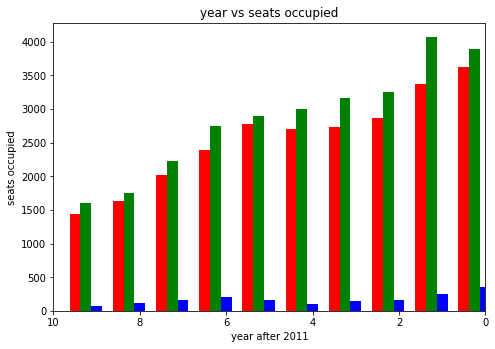

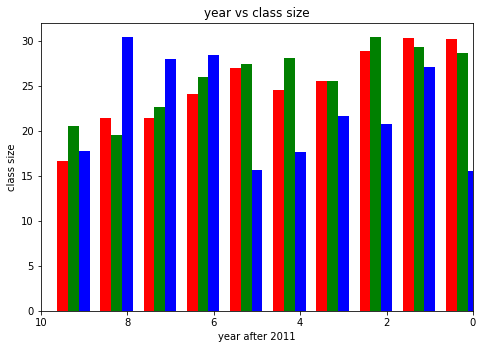

In [ ]:
plot_attribute(['seats occupied', 'class size'])

[2021. 2020. 2019. 2018. 2017. 2016. 2015. 2014. 2013. 2012.]
[28.7 29.3 30.4 25.5 28.1 27.4 26.  22.7 19.6 20.6]


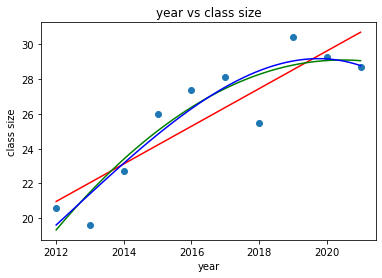

In [ ]:
x_axis = 'year'
y_axis = 'class size'

x = np.array(df[x_axis], dtype=float)
y = np.array(df[y_axis], dtype=float)
print(x)
print(y)

#polynomial fit with degree = 1
model1d = np.poly1d(np.polyfit(x, y, 1))

#polynomial fit with degree = 2
model2d = np.poly1d(np.polyfit(x, y, 2))

#polynomial fit with degree = 3
model3d = np.poly1d(np.polyfit(x, y, 3))

#add fitted polynomial line to scatterplot
polyline = np.linspace(2012, 2021) #start at stop for the polyline, for the x_axis

plt.scatter(x, y)
plt.plot(polyline, model1d(polyline), color='red')
plt.plot(polyline, model2d(polyline), color='green')
plt.plot(polyline, model3d(polyline), color='blue')
plt.title("year vs class size")
plt.xlabel(x_axis)
plt.ylabel(y_axis)
plt.show()

In [ ]:
values = pd.read_excel(pdf_path+"avgsizebysemester + seatsfilledrate 2016-2021.xlsx")
type(values)
values

,year,avg size,seats filled rate
0,fall 2016,27.40,90.896
1,spring 2016,27.00,88.900
2,fall 2017,28.10,99.300
3,spring 2017,24.60,88.700
4,fall 2018,25.50,95.200
5,spring 2018,25.50,91.200
6,fall 2019,30.40,92.100
7,spring 2019,28.90,92.300
8,fall 2020,29.30,86.700
9,spring 2020,30.30,89.400
